In [6]:
import pandas as pd
import numpy as np
import detect_activity as dt
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

practice2_df = pd.read_csv('/workspaces/Spider-Circadian-Activity/Practice code/Summer 24/Individual folders/Thomas/Data Files/Practice 2_data2.csv')

df_1 = pd.read_csv('/workspaces/Spider-Circadian-Activity/Practice code/Summer 24/Individual folders/Thomas/Data Files/one day_one_spider_1.csv')

# Tests with practice data

/workspaces/Spider-Circadian-Activity/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in detect (vectorized)
  outputs = ufunc(*inputs)


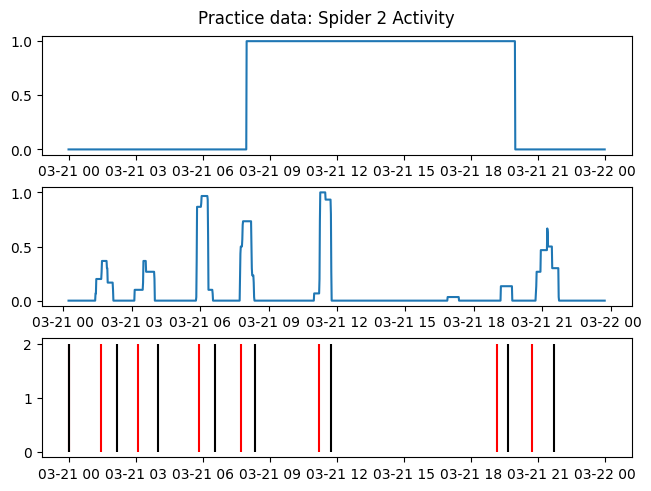

In [8]:
import detect_activity as dt
import matplotlib.pyplot as plt

spider2 = df_1['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

times = dt.interpret_times(df_1['Date_Time'], '%m/%d/%Y %H:%M')
pairs = dt.detect_threshold(spider2, times)
lights = df_1['Light']

fig, axs = plt.subplots(3, 1, constrained_layout=True)
fig.suptitle('Practice data: Spider 2 Activity')

axs[0].plot(times, lights)
axs[1].plot(times, spider2_smooth)
axs[2].plot(times, [0 for _ in spider2_smooth], color="white")

starts = []
stops = []
for [start, stop] in pairs:
    starts += [start]
    stops += [stop]

axs[2].vlines(starts, 0, 2, color="red")
axs[2].vlines(stops, 0, 2, color="black")

/workspaces/Spider-Circadian-Activity/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in detect (vectorized)
  outputs = ufunc(*inputs)


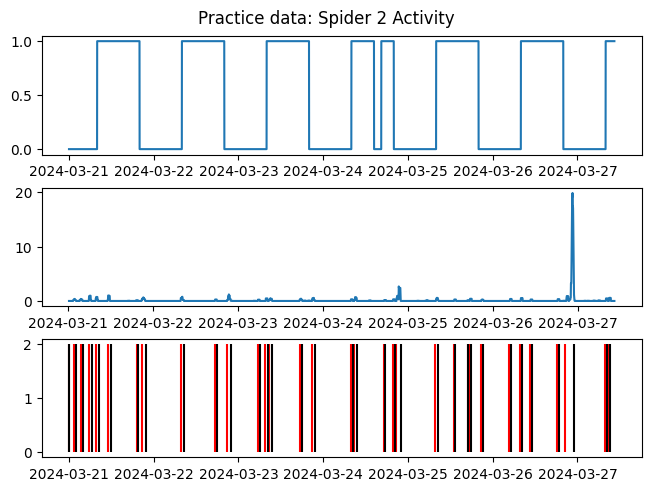

In [9]:
import detect_activity as dt
import matplotlib.pyplot as plt

df_2 = pd.read_csv('/workspaces/Spider-Circadian-Activity/Practice code/Summer 24/Individual folders/Thomas/Data Files/many days one spider_2.csv')

spider2 = df_2['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

times = dt.interpret_times(df_2['Date_Time'], '%m/%d/%Y %H:%M')
pairs = dt.detect_threshold(spider2_smooth, times)
lights = df_2['Light']

fig, axs = plt.subplots(3, 1, constrained_layout=True)
fig.suptitle('Practice data: Spider 2 Activity')

axs[0].plot(times, lights)
axs[1].plot(times, spider2_smooth)
axs[2].plot(times, [0 for _ in spider2_smooth], color="white")

starts = []
stops = []
for [start, stop] in pairs:
    starts += [start]
    stops += [stop]

axs[2].vlines(starts, 0, 2, color="red")
axs[2].vlines(stops, 0, 2, color="black")

/workspaces/Spider-Circadian-Activity/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in detect (vectorized)
  outputs = ufunc(*inputs)


3467.6470588235293


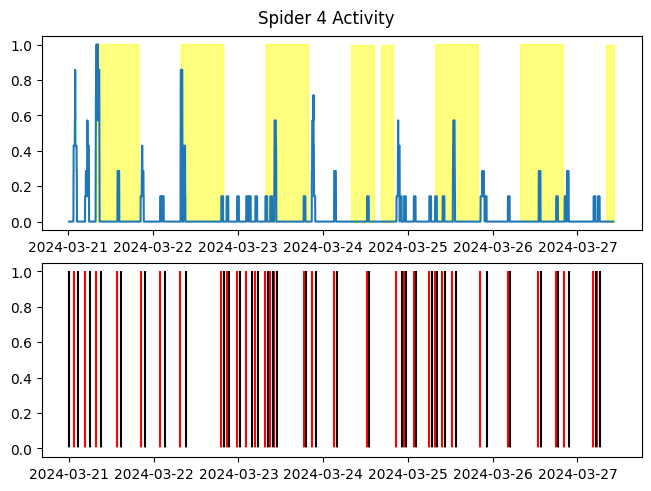

In [10]:
import detect_activity as dt
import matplotlib.pyplot as plt
import numpy as np

df_3 = pd.read_csv('/workspaces/Spider-Circadian-Activity/Practice code/Summer 24/Individual folders/Thomas/Data Files/many days three spiders_3.csv')

spider2 = df_3['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

spider4 = df_3['s4']
spider4_smooth = dt.moving_avg(spider4, 30)
spider4_max = max(np.nan_to_num(spider4_smooth))

spider5 = df_3['s5']
spider5_smooth = dt.moving_avg(spider5, 30)

times = dt.interpret_times(df_3['Date_Time'], '%m/%d/%Y %H:%M')
pairs = dt.detect_threshold(spider4_smooth, times)
lights = df_3['Light']

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.suptitle('Spider 4 Activity')

starts = []
stops = []
for [start, stop] in pairs:
    starts += [start]
    stops += [stop]

axs[1].vlines(starts, 0, 1, color="red")
axs[1].vlines(stops, 0, 1, color="black")
axs[0].fill_between(times, 0, 1, where=(lights == 1), alpha=.5, color="yellow")
axs[0].plot(times, spider4_smooth / spider4_max)
axs[1].plot(times, [0 for _ in spider4_smooth], color="white")

mean_activity_length = dt.mean_length(pairs)

print(mean_activity_length)